# HuggingFace demo

In [1]:
import pandas as pd
import transformers
import sys
sys.path.insert(0, '../src/utils')
import os
import requests
from helpers import compare_results
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)
pd.set_option('display.max_colwidth', 0)
os.environ["CURL_CA_BUNDLE"] = ""

-----
## Text-generation
<img src="img/eu.png" style="width: 400px;"/>

In [2]:
text_gen_pipeline = transformers.pipeline("text-generation", model="gpt2")

In [29]:
text_gen_pipeline("Once upon a time, there was the European Union", 
                  do_sample=True, max_length=50, pad_token_id=50256)

[{'generated_text': "Once upon a time, there was the European Union's second referendum. The result was overwhelming, and with almost 400,000 people in attendance, the Union was formed, as its name had shown, by citizens in 11 major European countries, the British"}]

--------
## Sentiment analysis
<img src="img/roll.jpg" style="width: 400px;"/>

In [4]:
sa_pipeline = transformers.pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

In [5]:
sa_pipeline(["Sausage rolls are an abomination", "Pizza is tasty"])

[{'label': 'NEGATIVE', 'score': 0.9984622001647949},
 {'label': 'POSITIVE', 'score': 0.9997138381004333}]

------
## Named-Entity Recognition
<img src="img/ryan.jpg" style="width: 300px;"/>

In [6]:
ner_pipeline = transformers.pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", aggregation_strategy="max")

In [7]:
ner_pipeline("Elizabeth II, the Queen of England, is no longer among us. However, the CEO of Ryanair is alive and kicking.")

[{'entity_group': 'PER',
  'score': 0.95577073,
  'word': 'Elizabeth II',
  'start': 0,
  'end': 12},
 {'entity_group': 'LOC',
  'score': 0.9980155,
  'word': 'England',
  'start': 27,
  'end': 34},
 {'entity_group': 'ORG',
  'score': 0.9996076,
  'word': 'Ryanair',
  'start': 79,
  'end': 86}]

------

## Question answering
<img src="img/curie.jpg" style="width: 200px;"/>

In [8]:
qa_pipeline = transformers.pipeline("question-answering", model="distilbert-base-cased-distilled-squad")

In [9]:
context = '''Marie Salomea Skłodowska–Curie, born Maria Salomea Skłodowska (7 November 1867 – 4 July 1934) was a Polish and naturalized-French physicist 
and chemist who conducted pioneering research on radioactivity. She was the first woman to win a Nobel Prize, the first person and the only woman to win the 
Nobel Prize twice, and the only person to win the Nobel Prize in two scientific fields. 
Her husband, Pierre Curie, was a co-winner on her first Nobel Prize, making them the first ever married couple to win the Nobel Prize and launching 
the Curie family legacy of five Nobel Prizes. She was, in 1906, the first woman to become a professor at the University of Paris.[5]
She was born in Warsaw, in what was then the Kingdom of Poland, part of the Russian Empire. She studied at Warsaw's clandestine 
Flying University and began her practical scientific training in Warsaw. In 1891, aged 24, she followed her elder sister Bronisława to study in Paris,
where she earned her higher degrees and conducted her subsequent scientific work.'''

qa_pipeline(question="Where was Marie Curie from?", context=context)

{'score': 0.18730977177619934, 'start': 100, 'end': 106, 'answer': 'Polish'}

____
## Translation
<img src="img/french.png" style="width: 400px;"/>

In [10]:
en_fr_translator = transformers.pipeline("translation_en_to_fr", model="t5-base", max_length=50)

In [11]:
en_fr_translator("Hello, I am cheese")

[{'translation_text': 'Bonjour, je suis fromage'}]

____
## Summarisation
Dataset: summary of episodes of Season 1 of Pokémon, Buffy, Black Mirror.

In [12]:
data_dir ='../data'
episodes = pd.read_csv(f'{data_dir}/processed/training_set.csv')
episodes.groupby('series').head(1)

,series,season,episode,summary,label
0,Black Mirror,s1,3,"With the implantation of a device called a ""grain"" behind their ear, people can replay their memories through their eyes or on a screen. At a dinner party, Liam is suspicious of his wife Ffion's behaviour towards her friend Jonas. Upon returning home, Ffion reveals a former relationship with Jonas, though some of her details are inconsistent. Liam drinks alcohol continually throughout the night and then heads to Jonas' house. On threat of glassing, Liam forces Jonas to delete every stored memory he has of Ffion. Liam crashes his car and when he regains consciousness, he replays his memories and notices one of Jonas's memories was of Ffion in bed. Liam confronts Ffion, who continues to lie, and forces her to show her memory of having sex with Jonas around the time her baby was conceived. Later, alone in the house, Liam uses a razor to try to remove his grain.","TV-series: Black Mirror. Characters: Liam, Ffion, Jonas."
9,Buffy,s2,18,"Buffy falls ill from flu, collapsing during a fight with Angelus, and is taken to hospital. In an apparent dream, she sees a boy outside her room, followed by a demonic figure. When Buffy wakes, she overhears a conversation about experimental treatments, and finds the boy, Ryan, who warns her that ""Death"" visits the hospital regularly. She enlists the help of her friends to investigate. They learn that Dr. Backer, who works at the hospital, has a history of controversial experimentation on children. Later, Buffy watches Dr. Backer attacked and killed by the demon, although she can no longer see it. Cordelia and Giles learn that the demon is called Kindestod (German for ""the child's death""), while Buffy and Willow learn that Dr. Backer's treatment was working on the children. Realizing that Kindestod is only visible to the sick, Buffy re-infects herself. She finds all the children gone, and sees Kindestod heading to the basement. Kindestod attacks Ryan there, but Buffy intervenes while Xander rescues the children. After a fight, Buffy breaks Kindestod's neck.","TV-series: Buffy. Characters: Buffy, Angelus, Ryan, Dr. Backer, Cordelia, Giles, Willow, Xander, Kindestod."
26,Pokémon,s1,77,"Ash enters his first match of the tournament on the water field, pitting his Krabby against Mandi the Astounding (ã‚³ãƒ¼ãƒ , KÅmu). During the battle, Krabby evolves into Kingler, who gives Ash the advantage to win the match and move onto the next preliminary round.","TV-series: Pokémon. Characters: Ash, Krabby, Mandi, Kingler."


In [13]:
summ_pipeline = transformers.pipeline("summarization", 
                                      model="sshleifer/distilbart-cnn-12-6"
                                     )
summ_pipeline(episodes.groupby('series').head(1)['summary'].tolist(), min_length=1, max_length=50)

[{'summary_text': " Liam is suspicious of his wife Ffion's behaviour towards her friend Jonas . He forces Jonas to delete every stored memory he has of her . Liam crashes his car and when he regains consciousness, he replays his memories ."},
 {'summary_text': ' Buffy falls ill from flu, collapsing during a fight with Angelus, and is taken to hospital . In an apparent dream, she sees a boy outside her room, followed by a demonic figure . She overhears a conversation about experimental treatments'},
 {'summary_text': ' Ash enters his first match of the tournament on the water field, pitting his Krabby against Mandi the Astounding . During the battle, Krabby evolves into Kingler, who gives Ash the advantage to win the match and move'}]

## Fine-tuning magic
* **Fine-tuning**: all transformers models can be fine-tuned by providing a few examples of what you'd like the output to look like. 
* **Attention layers are updated** to comform more with the kind of output you desire. The more examples in the fine-tuning, the best performance.

<img src="img/fine_tune.jpg" style="width: 400px;"/>

### Loading fine-tuned model 
* Model: `sshleifer/distilbart-cnn-12-6`
* Training set: 
    * **67 examples** from Season 1 of Pokémon/Buffy/Black Mirror
    * stratified sampling, **50% of episodes for each series** <br> (41 Pokémon, 14 Buffy, 5 Black Mirror)
    * manual tags 
    <br>`TV-series: {name}. Characters: {list of characters}`
    * time to completion: **~1 hour** on <br>
    <img src="img/specs.png" style="width: 400px;"/>

In [14]:
model_dir = '../models/summary_with_characters'

### Test data (remaining 67 episodes)

In [15]:
test_columns = ['series', 'season', 'episode']
test_data = pd.read_csv(f'{data_dir}/processed/test_set.csv')
test_data

,series,season,episode,summary
0,Black Mirror,s1,1,"Princess Susannah, a British royal family member, is kidnapped. For her return, the kidnapper demands that the prime minister, Michael Callow, have sex with a pig on live television. The demands gather attention on social media and then national news. Backup plans to fabricate footage of the act are trialled by Callow's staff without his knowledge and lead to a change in public opinion when the kidnapper discovers and reveals the plan. A failed raid on a suspected location leads to the injury of a journalist, Malaika, who has been communicating with government staff. Callow reluctantly agrees to go forward with the broadcast to an audience of over a billion. However, the kidnapperÃ¢â‚¬â€a famous artistÃ¢â‚¬â€had released Susannah shortly before the broadcast and then hanged himself, facts which are kept from the public and Callow. A year later, Callow maintains good approval ratings but his relationship with his wife is damaged."
1,Black Mirror,s2,1,"Martha's boyfriend Ash is killed while returning a hire van, the day after they move into a new house in the countryside. Martha learns she is pregnant and tests a service that her friend signed her up to: by aggregating Ash's many social media posts and online communications, an artificial intelligence (AI) imitation of Ash is created. Martha interacts with him via instant messaging and video call, talking on countryside walks and neglecting her sister's attempts to reach out. The next stage is a physical android version of Ash, which begins to make Martha uncomfortable. She argues with him and takes him to a cliff where she orders him to jump, but Martha is then frustrated as the real Ash would not obey such a command. Several years later, on Martha's daughter's birthday, her daughter takes a slice of cake to the android Ash kept in the attic, which she is only permitted to visit on weekends."
2,Black Mirror,s3,3,"A hacker records Kenny masturbating via his webcam and threatens to release it unless he follows their instructions. Kenny picks up a cake from another blackmailed individual and takes it to a hotel room where Hector was waiting to commit adultery with a sex worker. The hackers contact Hector, who complies with their commands to avoid losing custody of his children. Kenny and Hector drive to a bank and Kenny robs it at gunpoint. Hector drives Kenny to the woods to drop off the money and leaves to dispose of the car. Another blackmailed person explains to Kenny that they must fight to the death over the money while filmed by a drone. Kenny tries to shoot himself, but the gun is empty. Later, staggering out of the woods, Kenny discovers that the hackers have released the footage. His distraught mother calls him, having learned that he was masturbating to child pornography, as police swarm the area."
3,Black Mirror,s3,4,"In 1987, the shy Yorkie meets the outgoing Kelly in a beach resort town named San Junipero. The next week, the pair meet again and have sex. Yorkie struggles to find Kelly afterwards, until a man suggests looking in a different time. She searches in multiple decades until finding Kelly in 2002, where Kelly confesses that she is dying, and wanted to avoid developing feelings for Yorkie. They have sex again. San Junipero is revealed as a simulated reality inhabited by the deceased and elderly, who interact through their younger bodies. In California, Kelly meets a paralysed Yorkie, soon to be euthanised so that she can live in San Junipero permanently. Kelly marries Yorkie to authorise the euthanasia. However, the pair argue when Kelly says she does not wish to stay in San Junipero when she dies: her husband, with whom she was together for 49 years, did not choose to join after their daughter died without the option to do so. After some time, Kelly changes her mind and happily reunites with Yorkie after her own euthanasia."
4,Black Mirror,s3,5,"Soldiers are exterminating mutated humans called ""roaches""

### Run new summaries

In [16]:
summarizer = transformers.pipeline("summarization", model=model_dir)

In [17]:
predictions = pd.DataFrame(summarizer(test_data['summary'].tolist(), min_length=1, max_length=30))
test_data['predictions'] = predictions['summary_text']
test_data

,series,season,episode,summary,predictions
0,Black Mirror,s1,1,"Princess Susannah, a British royal family member, is kidnapped. For her return, the kidnapper demands that the prime minister, Michael Callow, have sex with a pig on live television. The demands gather attention on social media and then national news. Backup plans to fabricate footage of the act are trialled by Callow's staff without his knowledge and lead to a change in public opinion when the kidnapper discovers and reveals the plan. A failed raid on a suspected location leads to the injury of a journalist, Malaika, who has been communicating with government staff. Callow reluctantly agrees to go forward with the broadcast to an audience of over a billion. However, the kidnapperÃ¢â‚¬â€a famous artistÃ¢â‚¬â€had released Susannah shortly before the broadcast and then hanged himself, facts which are kept from the public and Callow. A year later, Callow maintains good approval ratings but his relationship with his wife is damaged.","TV-series: Black Mirror. Characters: Princess Susannah, Michael Callow, Malaika."
1,Black Mirror,s2,1,"Martha's boyfriend Ash is killed while returning a hire van, the day after they move into a new house in the countryside. Martha learns she is pregnant and tests a service that her friend signed her up to: by aggregating Ash's many social media posts and online communications, an artificial intelligence (AI) imitation of Ash is created. Martha interacts with him via instant messaging and video call, talking on countryside walks and neglecting her sister's attempts to reach out. The next stage is a physical android version of Ash, which begins to make Martha uncomfortable. She argues with him and takes him to a cliff where she orders him to jump, but Martha is then frustrated as the real Ash would not obey such a command. Several years later, on Martha's daughter's birthday, her daughter takes a slice of cake to the android Ash kept in the attic, which she is only permitted to visit on weekends.","TV-series: Black Mirror. Characters: Martha, Ash, Martha, her friend, Misty."
2,Black Mirror,s3,3,"A hacker records Kenny masturbating via his webcam and threatens to release it unless he follows their instructions. Kenny picks up a cake from another blackmailed individual and takes it to a hotel room where Hector was waiting to commit adultery with a sex worker. The hackers contact Hector, who complies with their commands to avoid losing custody of his children. Kenny and Hector drive to a bank and Kenny robs it at gunpoint. Hector drives Kenny to the woods to drop off the money and leaves to dispose of the car. Another blackmailed person explains to Kenny that they must fight to the death over the money while filmed by a drone. Kenny tries to shoot himself, but the gun is empty. Later, staggering out of the woods, Kenny discovers that the hackers have released the footage. His distraught mother calls him, having learned that he was masturbating to child pornography, as police swarm the area.","TV-series: Black Mirror. Characters: Kenny, Hector."
3,Black Mirror,s3,4,"In 1987, the shy Yorkie meets the outgoing Kelly in a beach resort town named San Junipero. The next week, the pair meet again and have sex. Yorkie struggles to find Kelly afterwards, until a man suggests looking in a different time. She searches in multiple decades until finding Kelly in 2002, where Kelly confesses that she is dying, and wanted to avoid developing feelings for Yorkie. They have sex again. San Junipero is revealed as a simulated reality inhabited by the deceased and elderly, who interact through their younger bodies. In California, Kelly meets a paralysed Yorkie, soon to be euthanised so that she can live in San Junipero permanently. Kelly marries Yorkie to authorise the euthanasia. However, the pair argue when Kelly says she does not wish to stay in San Junipero when she dies: her husband, with whom she was together for 49 years, did not choose to join after th

### Checking performance

In [18]:
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

In [19]:
test_data = test_data.merge(pd.read_csv(f'{data_dir}/interim/all_episodes_labelled.csv',
                               usecols=test_columns + ['label']), 
                    on=test_columns, 
                    how='left')

In [20]:
compare_results(test_data, 'predictions')

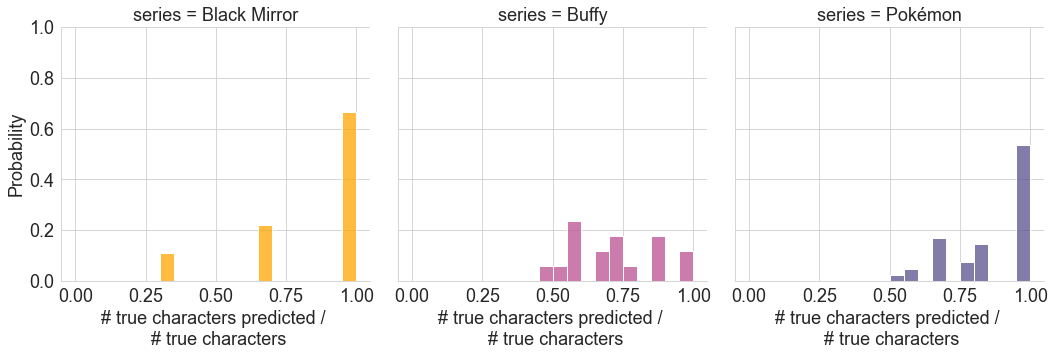

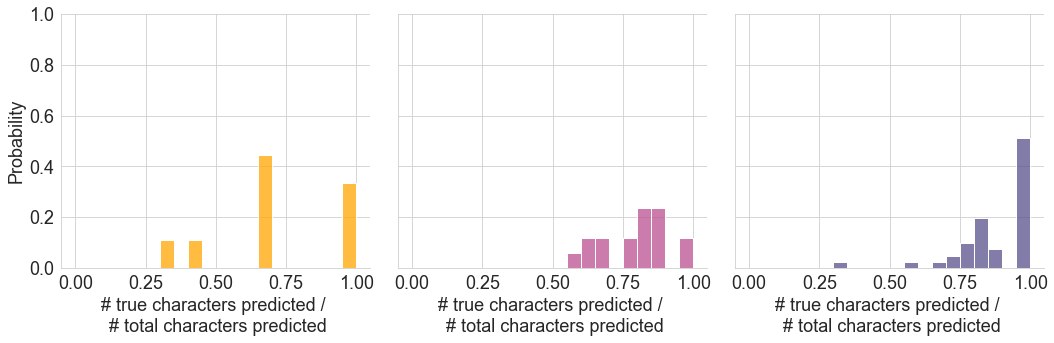

In [21]:
plt.rcParams.update({'font.size': 18,
                     'figure.figsize': [20, 0]})
height = 5
palette = {'Black Mirror': '#ffa600', 'Buffy': '#bc5090', 'Pokémon':'#58508d'}
labels = {"predictions_pc": '# true characters predicted / \n # true characters', 
          "predictions_set_js": '# true characters predicted / \n # total characters predicted'}
plots = list()
for var in ["predictions_pc", "predictions_set_js"]:
    plot = sns.FacetGrid(test_data, col="series", height=5, hue='series', palette=palette)
    plot.map(sns.histplot, var, stat='probability', binwidth=.05, binrange=(0,1))
    plot.set_axis_labels(labels[var])
    plot.set(ylim=(0, 1))
    plots.append(plot)
for ax in plots[-1].axes.flatten():
    ax.set_title('')
plt.show()

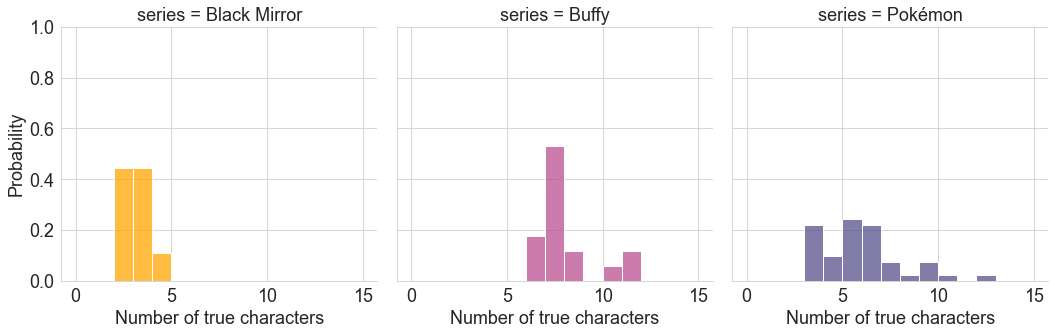

In [22]:
for var in ["n_true_characters"]:
    plot = sns.FacetGrid(test_data, col="series", height=5, hue='series', palette=palette)
    plot.map(sns.histplot, var, stat='probability', binwidth=1, binrange=(0,15))
    plot.set_axis_labels('Number of true characters')
    plot.set(ylim=(0, 1))
plt.show()

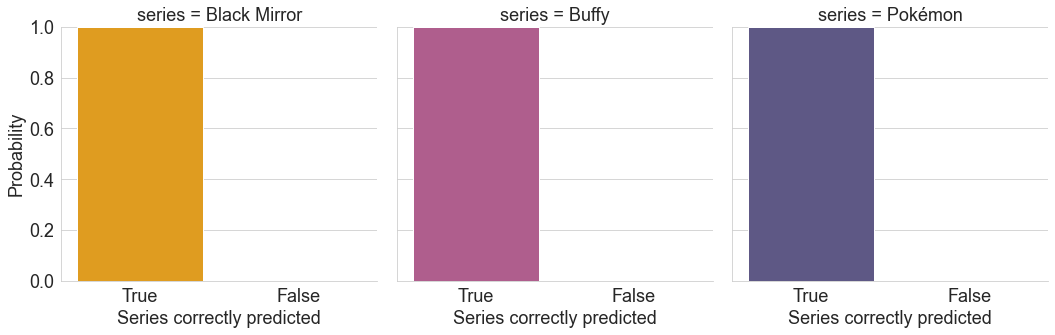

In [23]:
for var in ["predictions_correct_series"]:
    tmp = ((test_data.groupby(["series", var])['episode'].nunique() / test_data.groupby(["series"])['episode'].nunique()).reset_index().rename(columns={'episode': 'Probability'}))
    plot = sns.FacetGrid(tmp, col="series", height=5, hue='series', palette=palette)
    plot.map(sns.barplot, var, 'Probability', order=[True, False])
    plot.set_axis_labels('Series correctly predicted')
    plot.set(ylim=(0, 1))
plt.show()

## Language-specificity test
Is the summariser being mindful of language **as a whole** or just of keywords? Is it perhaps modelling our episodes somehow very trivial based on noun entities?

| summary | is_ash_present | is_buffy_present | is_spike_present | is_pikachu_present | ... | TV-series    |
|---------|----------------|------------------|------------------|--------------------|-----|--------------|
| ...     | 1              | 0                | 0                | 1                  | ... | Pokémon      |
| ...     | 1              | 0                | 0                | 0                  | ... | Pokémon      |
| ...     | 0              | 1                | 1                | 0                  | ... | Buffy        |
| ...     | 0              | 0                | 0                | 0                  | ... | Black Mirror |

In [24]:
import re
test_data['anon_summary'] = test_data.summary.map(lambda x: ' '.join([re.sub(r"\s*[A-Z][^\s]+", "[redacted]", i.strip()) for i in x.split()]))
test_data[['series', 'summary', 'anon_summary']].groupby('series').head(1)

,series,summary,anon_summary
0,Black Mirror,"Princess Susannah, a British royal family member, is kidnapped. For her return, the kidnapper demands that the prime minister, Michael Callow, have sex with a pig on live television. The demands gather attention on social media and then national news. Backup plans to fabricate footage of the act are trialled by Callow's staff without his knowledge and lead to a change in public opinion when the kidnapper discovers and reveals the plan. A failed raid on a suspected location leads to the injury of a journalist, Malaika, who has been communicating with government staff. Callow reluctantly agrees to go forward with the broadcast to an audience of over a billion. However, the kidnapperÃ¢â‚¬â€a famous artistÃ¢â‚¬â€had released Susannah shortly before the broadcast and then hanged himself, facts which are kept from the public and Callow. A year later, Callow maintains good approval ratings but his relationship with his wife is damaged.","[redacted] [redacted] a [redacted] royal family member, is kidnapped. [redacted] her return, the kidnapper demands that the prime minister, [redacted] [redacted] have sex with a pig on live television. [redacted] demands gather attention on social media and then national news. [redacted] plans to fabricate footage of the act are trialled by [redacted] staff without his knowledge and lead to a change in public opinion when the kidnapper discovers and reveals the plan. A failed raid on a suspected location leads to the injury of a journalist, [redacted] who has been communicating with government staff. [redacted] reluctantly agrees to go forward with the broadcast to an audience of over a billion. [redacted] the kidnapperÃ¢â‚¬â€a famous artistÃ¢â‚¬â€had released [redacted] shortly before the broadcast and then hanged himself, facts which are kept from the public and [redacted] A year later, [redacted] maintains good approval ratings but his relationship with his wife is damaged."
9,Buffy,"After slaying a vampire, Buffy and Giles find a ring that they link with a prophecy of the Anointed One, who can free the Master from his prison. Buffy arranges a date with a student named Owen, but Giles believes that the prophecy will be fulfilled that evening. The two wait at the graveyard, but see nothing. That evening, a bus crashes and five people die after vampires attack it. Giles connects the crash to the prophecy, but Buffy decides to leave with Owen. Giles visits the funeral home, and is cornered by vampires. Angel warns Buffy about the Prophecy, but she dismisses the warnings until Willow and Xander show up. Owen follows the three to the funeral home, and Buffy leaves him with Xander and Willow. However, they run into a victim of the bus crash, now a vampire. Buffy, Giles, and Owen subdue the vampire, before Buffy forces him into a furnace. The next day, Owen asks for another date, but Buffy refuses, fearing for his safety should they stay together. Giles and Buffy take comfort in believing that they stopped the prophecy, but the real Anointed One, a young boy, meets the Master in his underground lair.","[redacted] slaying a vampire, [redacted] and [redacted] find a ring that they link with a prophecy of the [redacted] [redacted] who can free the [redacted] from his prison. [redacted] arranges a date with a student named [redacted] but [redacted] believes that the prophecy will be fulfilled that evening. [redacted] two wait at the graveyard, but see nothing. [redacted] evening, a bus crashes and five people die after vampires attack it. [redacted] connects the crash to the prophecy, but [redacted] decides to leave with [redacted] [redacted] visits the funeral home, and is cornered by vampires. [redacted] warns [redacted] about the [redacted] but she dismisses the warnings until [redacted] and [redacted] show up. [redacted] follows the three to the funeral home, and [redacted] leaves him with [redacted] and [redacted] [redacted] they run into a victim of the 

In [25]:
predictions = pd.DataFrame(summarizer(test_data['anon_summary'].tolist(), min_length=1, max_length=30))
test_data['anon_predictions'] = predictions

In [26]:
compare_results(test_data, 'anon_predictions')

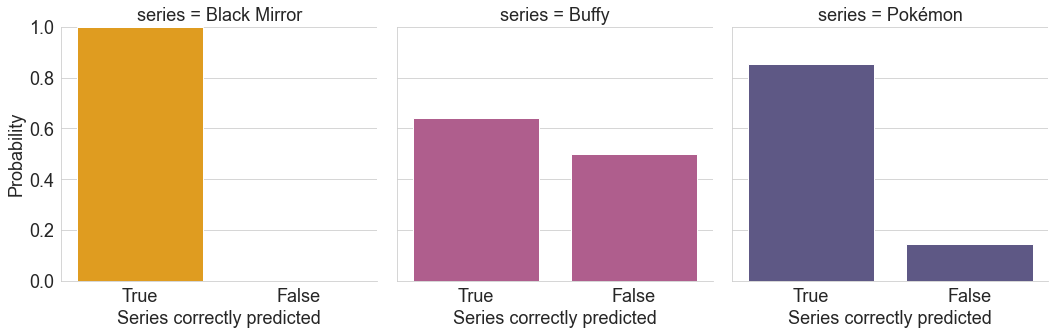

In [27]:
for var in ["anon_predictions_correct_series"]:
    tmp = ((test_data.groupby(["series", var])['episode'].nunique() / test_data.groupby(["series"])['episode'].nunique()).reset_index().rename(columns={'episode': 'Probability'}))
    plot = sns.FacetGrid(tmp, col="series", height=5, hue='series', palette=palette)
    plot.map(sns.barplot, var, 'Probability', order=[True, False])
    plot.set_axis_labels('Series correctly predicted')
    plot.set(ylim=(0, 1))
plt.show()

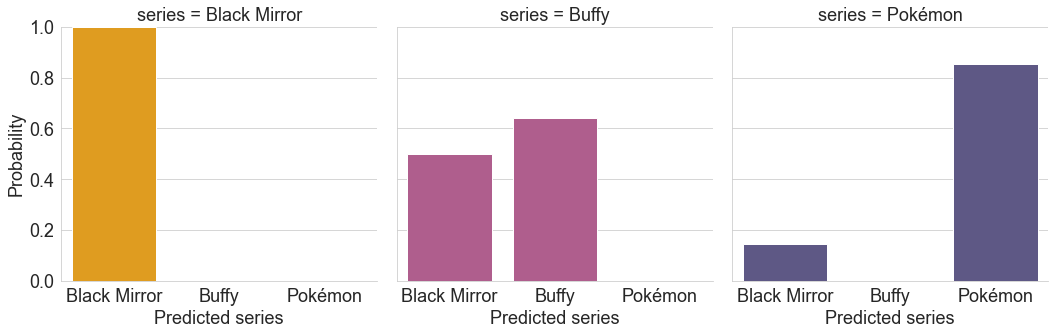

In [28]:
for var in ['anon_predictions_predicted_series']:
    tmp = ((test_data.groupby(["series", var])['episode'].nunique() / test_data.groupby(["series"])['episode'].nunique()).reset_index().rename(columns={'episode': 'Probability'}))
    plot = sns.FacetGrid(tmp, col="series", height=5, hue='series', palette=palette)
    plot.map(sns.barplot, var, 'Probability', order=['Black Mirror', 'Buffy', 'Pokémon'])
    plot.set_axis_labels('Predicted series')
    plot.set(ylim=(0, 1))
plt.show()